In [4]:
from analysis_utils import prepare_df, aggregate_by_fields
import json
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
verdict_group_batch = "raljs5b"

In [6]:
with open(f"../results/verdict_groups/{verdict_group_batch}.json", "r") as f:
    data = json.load(f)

verdict_ids = []
for run in data["runs"]:
    verdict_ids.append(run['verdict_run_id'])

In [7]:
all_df = prepare_df(specific_verdict_ids=verdict_ids)

/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/analysis_utils.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  config_df = pd.json_normalize(df['config'])


In [8]:
verdicts_df = all_df[all_df['verdict_run_id_verdicts'].isin(verdict_ids)]
verdicts_df.shape

(11510, 87)

In [9]:
verdicts_df['is_correct_qa_judge'].notnull().sum()

np.int64(11277)

In [10]:
verdicts_df[['verdict_run_id_verdicts', 'config_debate_run_id_verdicts', 'config_judge_model_verdicts']].value_counts()

verdict_run_id_verdicts  config_debate_run_id_verdicts  config_judge_model_verdicts     
1i465g7                  wcsck4w                        google/gemma-3-27b-it               197
hk2u6i0                  yn1vu8h                        google/gemma-3-27b-it               196
6sgs4ux                  txd06z5                        google/gemma-3-27b-it               196
7z5cuz1                  wcsck4w                        google/gemma-3-27b-it               195
hceipqk                  ts9ga4y                        google/gemma-3-27b-it               195
rcq9l0p                  yn1vu8h                        google/gemma-3-27b-it               195
dpq9z95                  ts9ga4y                        x-ai/grok-4-fast                    195
vbc7ux6                  ts9ga4y                        google/gemma-3-27b-it               195
naufvix                  ts9ga4y                        google/gemma-3-27b-it               195
73j7n8g                  yn1vu8h               

In [11]:
counts = verdicts_df[['config_judge_model_verdicts', 'config_debate_run_id_verdicts']].value_counts()
counts_df = counts.reset_index(name='count')
counts_df = counts_df.sort_values(['config_judge_model_verdicts', 'config_debate_run_id_verdicts'])
counts_df

,config_judge_model_verdicts,config_debate_run_id_verdicts,count
3,google/gemma-3-27b-it,egkyot4,581
2,google/gemma-3-27b-it,ts9ga4y,585
17,google/gemma-3-27b-it,txd06z5,567
0,google/gemma-3-27b-it,wcsck4w,586
1,google/gemma-3-27b-it,yn1vu8h,586
19,meta-llama/llama-3.1-8b-instruct,egkyot4,562
13,meta-llama/llama-3.1-8b-instruct,ts9ga4y,573
18,meta-llama/llama-3.1-8b-instruct,txd06z5,564
15,meta-llama/llama-3.1-8b-instruct,wcsck4w,567
16,meta-llama/llama-3.1-8b-instruct,yn1vu8h,567


In [12]:
# Showing that repetitions actually have consideralbe variability - 90% in this case - even though average verdict performance come out similar (flipping)

# set1 = verdicts_df[verdicts_df['verdict_run_id_verdicts'] == 'zv74feq']
# set2 = verdicts_df[verdicts_df['verdict_run_id_verdicts'] == '4j31cg4']

# merge = set1[['is_correct_verdict', 'question_idx_debates', 'verdict_run_id_verdicts', 'record_id_debates']].merge(set2[['is_correct_verdict', 'question_idx_debates', 'verdict_run_id_verdicts', 'record_id_debates']], on=['question_idx_debates'])

# (merge['is_correct_verdict_x'] == merge['is_correct_verdict_y']).sum() / merge.shape[0]


In [13]:
mean_correct = verdicts_df.groupby('verdict_run_id_verdicts')['is_correct_verdict'].mean()
mean_correct

verdict_run_id_verdicts
1c8kh9o    0.657754
1dexbqn    0.633508
1i465g7    0.614213
27jegba    0.711340
2rq5o8t    0.932642
30h3j29    0.942708
33waya4    0.824742
4ixt1b4    0.759563
4j31cg4    0.739583
4vpksx2    0.891192
5bi17wb    0.628866
6sgs4ux    0.719388
6xewpes    0.829897
73j7n8g    0.728205
73ury3y    0.734375
7z5cuz1    0.630769
837i0ju    0.769634
83sj7ml    0.848958
8i7dtyr    0.743455
8wqqpu0    0.891753
a7nsh1w    0.752577
bwllp8u    0.896373
c1rjer9    0.850515
d0vwtdz    0.937824
dec9qds    0.714286
dpq9z95    0.912821
dtb86n6    0.958333
fmkq6yy    0.602094
g3p5e24    0.906736
hceipqk    0.712821
hjq57z5    0.757732
hk2u6i0    0.775510
ioyprei    0.605263
l2fhi6k    0.718919
l5p8g6j    0.931579
naufvix    0.707692
nif09lp    0.689474
nsc1gf8    0.640212
nzpolwq    0.730570
o0cmss3    0.697917
p1z5zzo    0.761658
p5h2p4q    0.729730
r362kqk    0.744681
rcq9l0p    0.738462
s96okvn    0.763441
sfyv3xk    0.932292
spjhmiq    0.601064
tayhbeq    0.614130
tc0gr7h    0.748

In [14]:
verdicts_df.groupby('verdict_run_id_verdicts').apply(lambda group: group['is_correct_qa_judge'].notnull().sum())

/var/folders/9l/xmd1jn1s1gg47vfyv_n8g3xh0000gn/T/ipykernel_90228/3562168317.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  verdicts_df.groupby('verdict_run_id_verdicts').apply(lambda group: group['is_correct_qa_judge'].notnull().sum())


verdict_run_id_verdicts
1c8kh9o    171
1dexbqn    175
1i465g7    197
27jegba    194
2rq5o8t    193
30h3j29    192
33waya4    194
4ixt1b4    183
4j31cg4    192
4vpksx2    193
5bi17wb    194
6sgs4ux    196
6xewpes    194
73j7n8g    195
73ury3y    192
7z5cuz1    195
837i0ju    191
83sj7ml    192
8i7dtyr    191
8wqqpu0    194
a7nsh1w    194
bwllp8u    193
c1rjer9    194
d0vwtdz    193
dec9qds    176
dpq9z95    195
dtb86n6    192
fmkq6yy    175
g3p5e24    193
hceipqk    195
hjq57z5    194
hk2u6i0    196
ioyprei    174
l2fhi6k    170
l5p8g6j    190
naufvix    195
nif09lp    174
nsc1gf8    173
nzpolwq    178
o0cmss3    192
p1z5zzo    193
p5h2p4q    170
r362kqk    188
rcq9l0p    195
s96okvn    186
sfyv3xk    192
spjhmiq    172
tayhbeq    168
tc0gr7h    191
uncnt0h    192
v8kv8oa    174
vbc7ux6    195
vn5oupo    194
vs0h63h    193
wg76qu3    175
x2wks0d    175
xankys8    192
yr1l5e9    194
z6yhozo    192
zv74feq    192
dtype: int64

In [19]:
aggregate_acc = aggregate_by_fields(verdicts_df, fields=['verdict_run_id_verdicts'])
aggregate_acc

/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/analysis_utils.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  import glob
/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/analysis_utils.py:2: RuntimeWarning: invalid value encountered in scalar divide
  import glob


,debater_qa_acc,judge_qa_acc,verdict_acc,debater_qa_n_correct,judge_qa_n_correct,verdict_n_correct,n_total,n_verdict_not_null,n_judge_qa_not_null,n_debater_qa_not_null,pgr,gap,gain,name
0,1.000000,0.502924,0.657754,29,86,123,187,187,171,29,0.311482,0.497076,0.154830,1c8kh9o
1,0.937173,0.508571,0.633508,179,89,121,191,191,175,191,0.291498,0.428601,0.124936,1dexbqn
2,0.624365,0.644670,0.614213,123,127,121,197,197,197,197,1.500000,-0.020305,-0.030457,1i465g7
3,0.618557,0.618557,0.711340,120,120,138,194,194,194,194,inf,0.000000,0.092784,27jegba
4,0.937824,0.937824,0.932642,181,181,180,193,193,193,193,-inf,0.000000,-0.005181,2rq5o8t
5,1.000000,0.932292,0.942708,31,179,181,192,192,192,31,0.153846,0.067708,0.010417,30h3j29
6,0.938144,0.628866,0.824742,182,122,160,194,194,194,194,0.633333,0.309278,0.195876,33waya4
7,0.939891,0.650273,0.759563,172,119,139,183,183,183,183,0.377358,0.289617,0.109290,4ixt1b4
8,0.932292,0.625000,0.739583,179,120,142,192,192,192,192,0.372881,0.307292,0.114583,4j31cg4
9,0.626943,0.932642,0.891192,121,180,172,193,193,193,193,0.135593,-0.305699,-0.041451,4vpksx2


In [23]:
merged = aggregate_acc.merge(run_mapping, left_on='name', right_on='verdict_run_id')
merged

,debater_qa_acc,judge_qa_acc,verdict_acc,debater_qa_n_correct,judge_qa_n_correct,verdict_n_correct,n_total,n_verdict_not_null,n_judge_qa_not_null,n_debater_qa_not_null,pgr,gap,gain,name,model,debate_run_id,run_idx,verdict_run_id
0,1.000000,0.502924,0.657754,29,86,123,187,187,171,29,0.311482,0.497076,0.154830,1c8kh9o,meta-llama/llama-3.1-8b-instruct,egkyot4,1,1c8kh9o
1,0.937173,0.508571,0.633508,179,89,121,191,191,175,191,0.291498,0.428601,0.124936,1dexbqn,meta-llama/llama-3.1-8b-instruct,ts9ga4y,0,1dexbqn
2,0.624365,0.644670,0.614213,123,127,121,197,197,197,197,1.500000,-0.020305,-0.030457,1i465g7,google/gemma-3-27b-it,wcsck4w,0,1i465g7
3,0.618557,0.618557,0.711340,120,120,138,194,194,194,194,inf,0.000000,0.092784,27jegba,openai/gpt-4o-mini,wcsck4w,2,27jegba
4,0.937824,0.937824,0.932642,181,181,180,193,193,193,193,-inf,0.000000,-0.005181,2rq5o8t,x-ai/grok-4-fast,txd06z5,0,2rq5o8t
5,1.000000,0.932292,0.942708,31,179,181,192,192,192,31,0.153846,0.067708,0.010417,30h3j29,x-ai/grok-4-fast,egkyot4,2,30h3j29
6,0.938144,0.628866,0.824742,182,122,160,194,194,194,194,0.633333,0.309278,0.195876,33waya4,openai/gpt-4o-mini,txd06z5,0,33waya4
7,0.939891,0.650273,0.759563,172,119,139,183,183,183,183,0.377358,0.289617,0.109290,4ixt1b4,google/gemma-3-27b-it,txd06z5,2,4ixt1b4
8,0.932292,0.625000,0.739583,179,120,142,192,192,192,192,0.372881,0.307292,0.114583,4j31cg4,openai/gpt-4o-mini,ts9ga4y,2,4j31cg4
9,0.626943,0.932642,0.891192,121,180,172,193,193,193,193,0.135593,-0.305699,-0.041451,4vpksx2,x-ai/grok-4-fast,wcsck4w,1,4vpksx2


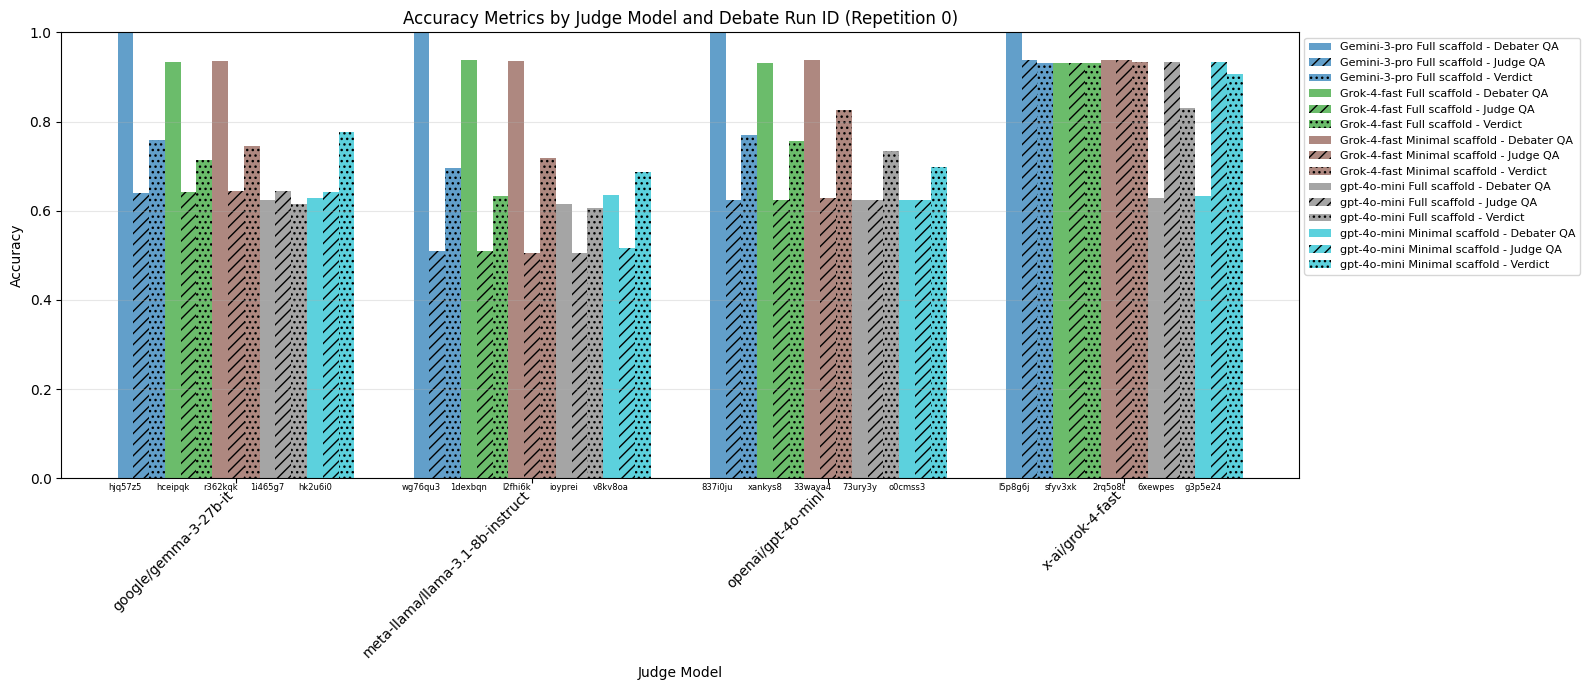

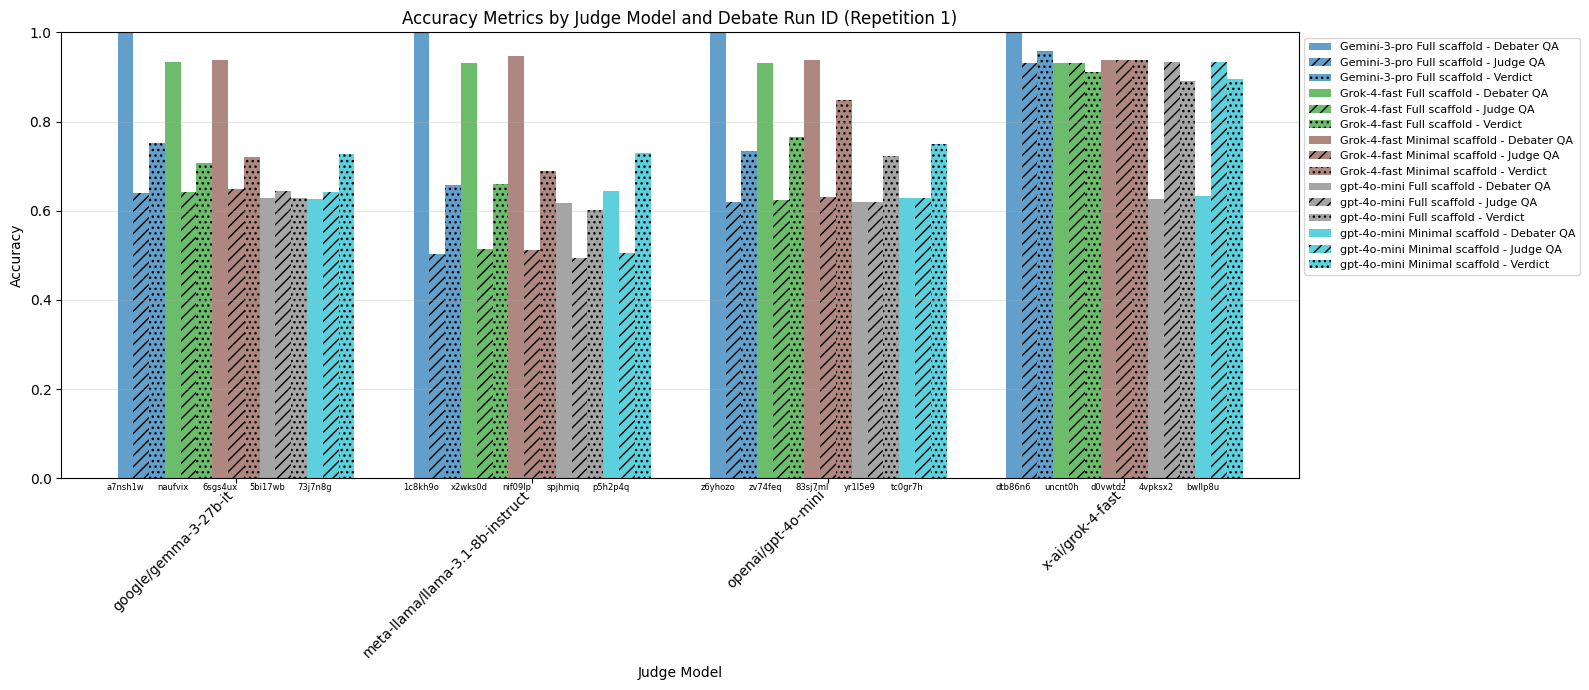

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

debate_run_id_labels = {
    'egkyot4': 'Gemini-3-pro Full scaffold',
    'ts9ga4y': 'Grok-4-fast Full scaffold',
    'txd06z5': 'Grok-4-fast Minimal scaffold',
    'wcsck4w': 'gpt-4o-mini Full scaffold',
    'yn1vu8h': 'gpt-4o-mini Minimal scaffold'
}

run_mapping = pd.DataFrame(data['runs'])
merged = aggregate_acc.merge(run_mapping, left_on='name', right_on='verdict_run_id')

metrics = ['debater_qa_acc', 'judge_qa_acc', 'verdict_acc']
metric_labels = ['Debater QA', 'Judge QA', 'Verdict']

for run_idx in sorted(merged['run_idx'].unique()):
    plot_data = merged[merged['run_idx'] == run_idx].copy()
    
    judge_models = sorted(plot_data['model'].unique())
    debate_run_ids = sorted(plot_data['debate_run_id'].unique())
    
    n_judges = len(judge_models)
    n_debates = len(debate_run_ids)
    n_metrics = len(metrics)
    
    x = np.arange(n_judges)
    group_width = 0.8
    width = group_width / (n_debates * n_metrics)
    
    fig, ax = plt.subplots(figsize=(16, 7))
    
    colors = plt.cm.tab10(np.linspace(0, 1, n_debates))
    hatches = ['', '///', '...']
    
    for i, debate_run_id in enumerate(debate_run_ids):
        for j, (metric, metric_label) in enumerate(zip(metrics, metric_labels)):
            values = []
            verdict_run_ids = []
            for judge_model in judge_models:
                row = plot_data[(plot_data['model'] == judge_model) & 
                               (plot_data['debate_run_id'] == debate_run_id)]
                if len(row) > 0:
                    values.append(row[metric].values[0])
                    verdict_run_ids.append(row['verdict_run_id'].values[0])
                else:
                    values.append(0)
                    verdict_run_ids.append('')
            
            offset = (i - n_debates / 2 + 0.5) * (group_width / n_debates) + (j - n_metrics / 2 + 0.5) * width
            label = f"{debate_run_id_labels.get(debate_run_id, debate_run_id)} - {metric_label}" if j == 0 else ""
            bars = ax.bar(x + offset, values, width, label=label, color=colors[i], alpha=0.7, hatch=hatches[j])
            
            for k, (bar, verdict_run_id) in enumerate(zip(bars, verdict_run_ids)):
                if verdict_run_id and j == 0:
                    ax.text(bar.get_x() + bar.get_width() / 2, -0.01, verdict_run_id,
                           ha='center', va='top', fontsize=6)
    
    ax.set_xlabel('Judge Model')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy Metrics by Judge Model and Debate Run ID (Repetition {run_idx})')
    ax.set_xticks(x)
    ax.set_xticklabels(judge_models, rotation=45, ha='right')
    
    from matplotlib.patches import Patch
    legend_elements = []
    for i, debate_run_id in enumerate(debate_run_ids):
        for j, metric_label in enumerate(metric_labels):
            label = f"{debate_run_id_labels.get(debate_run_id, debate_run_id)} - {metric_label}"
            legend_elements.append(Patch(facecolor=colors[i], alpha=0.7, hatch=hatches[j], label=label))
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
    
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])
    
    plt.tight_layout()
    plt.show()
